<a href="https://colab.research.google.com/github/arutraj/ML_Basics/blob/main/ClusterQuest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Name:   Rajavel Sethupathi
###Email:  rajvel@gmail.com
### ClusterQuest - Unveiling Cohorts in Social Networks

###Facebook Graph Dataset

This notebook uses the dataset in the file called *facebook_combined.txt*.
Each line in the dataset denotes a connection between two users represented by corresponding user ids. For example, the following row denotes a connection between a user with user-id 1104 to a user with user-id 1404.

1104 1404

*You can create a graph out of the connections represented by this data.*
*If you observe closely in the data file, you will notice that there is no entry in the file for a connection from user 1404 to user 1104 (opposite of the row above). This is because in Facebook, a friendship is a two way connection, which means that two friends on Facebook always follow each other.*

In [2]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install networkx --upgrade

In [ ]:
!pip install matplotlib --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 14.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 19.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 

In [ ]:
!pip install igraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 13.0 MB/s eta 0:00:00


## Import the necessary modules

In [3]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

In [ ]:
from igraph import Graph
igraph_fb = Graph.Read('/content/drive/MyDrive/facebook_combined.txt', directed = False)

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a Graph Object
#
FBG =nx.read_edgelist("/content/drive/MyDrive/facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

In [5]:
print("Number of Nodes in the cluster: ", FBG.number_of_nodes())
print("Number of Edges in the cluster: ", FBG.number_of_edges())

Number of Nodes in the cluster:  4039
Number of Edges in the cluster:  88234


## Simple drawing the graph with Matplotlib without labels or axes

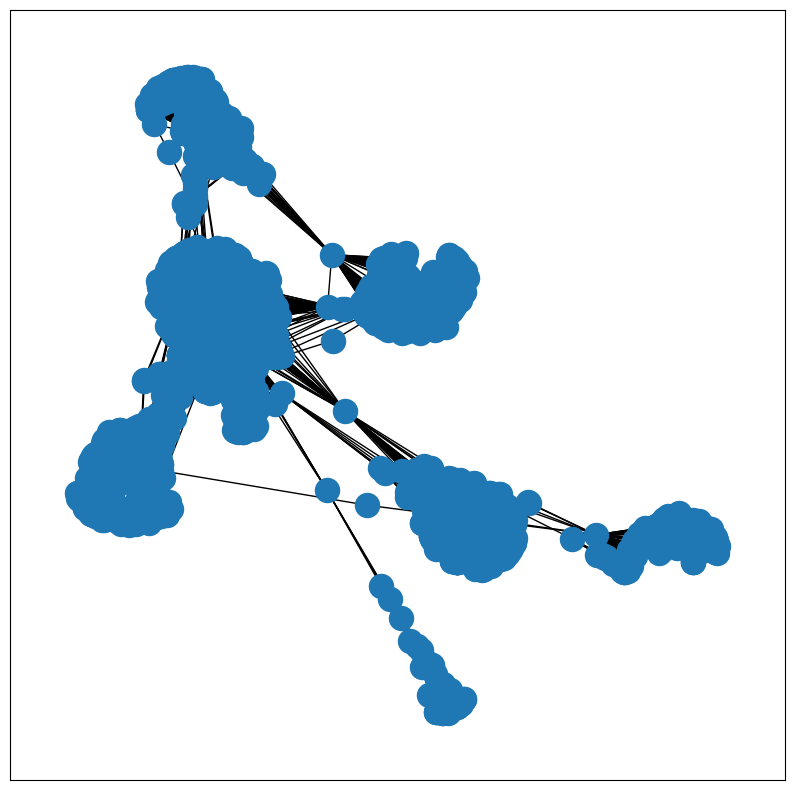

In [6]:
plt.figure(figsize=(10,10))
nx.draw_networkx(FBG, with_labels=False )


Social network analysis is a way to understand how networks behave, and uncover the most important nodes within them using the following features - *Degree Centrality, Betweenness Centrality, Closeness Centrality, PageRank Centrality, Eigen Centrality, kCores, and Distance/shortest path.*
Reference:  https://cambridge-intelligence.com/social-network-analysis/

**Degree Centrality** measure finds nodes with the highest number of links to other nodes in the network.

In [7]:
deg_centrality = nx.degree_centrality(FBG)
sorted_centralities = sorted(deg_centrality.items(), key=lambda x: x[1], reverse=True)
print(sorted_centralities)

[(107, 0.258791480931154), (1684, 0.1961367013372957), (1912, 0.18697374938088163), (3437, 0.13546310054482416), (0, 0.08593363051015354), (2543, 0.07280832095096582), (2347, 0.07206537890044576), (1888, 0.0629024269440317), (1800, 0.06067360079247152), (1663, 0.058197127290737984), (1352, 0.05794947994056463), (2266, 0.05794947994056463), (483, 0.057206537890044575), (348, 0.05671124318969787), (1730, 0.055968301139177806), (1985, 0.0554730064388311), (1941, 0.05522535908865775), (2233, 0.0549777117384844), (2142, 0.054730064388311045), (1431, 0.05448241703813769), (1199, 0.05373947498761763), (1584, 0.05225359088657751), (2206, 0.052005943536404156), (1768, 0.051758296186230804), (2229, 0.0512630014858841), (2410, 0.0512630014858841), (2611, 0.0512630014858841), (1086, 0.050767706785537395), (1589, 0.050767706785537395), (2047, 0.050767706785537395), (2218, 0.050767706785537395), (2078, 0.05052005943536404), (1993, 0.05027241208519068), (2123, 0.05027241208519068), (1746, 0.050024764

In [30]:
# to see the number of neighbors for the nodes with the highest degree centralities
#
(sorted(FBG.degree, key=lambda item:item[1], reverse=True))[:8]

[(107, 1045),
 (1684, 792),
 (1912, 755),
 (3437, 547),
 (0, 347),
 (2543, 294),
 (2347, 291),
 (1888, 254)]

Text(0, 0.5, 'Counts')

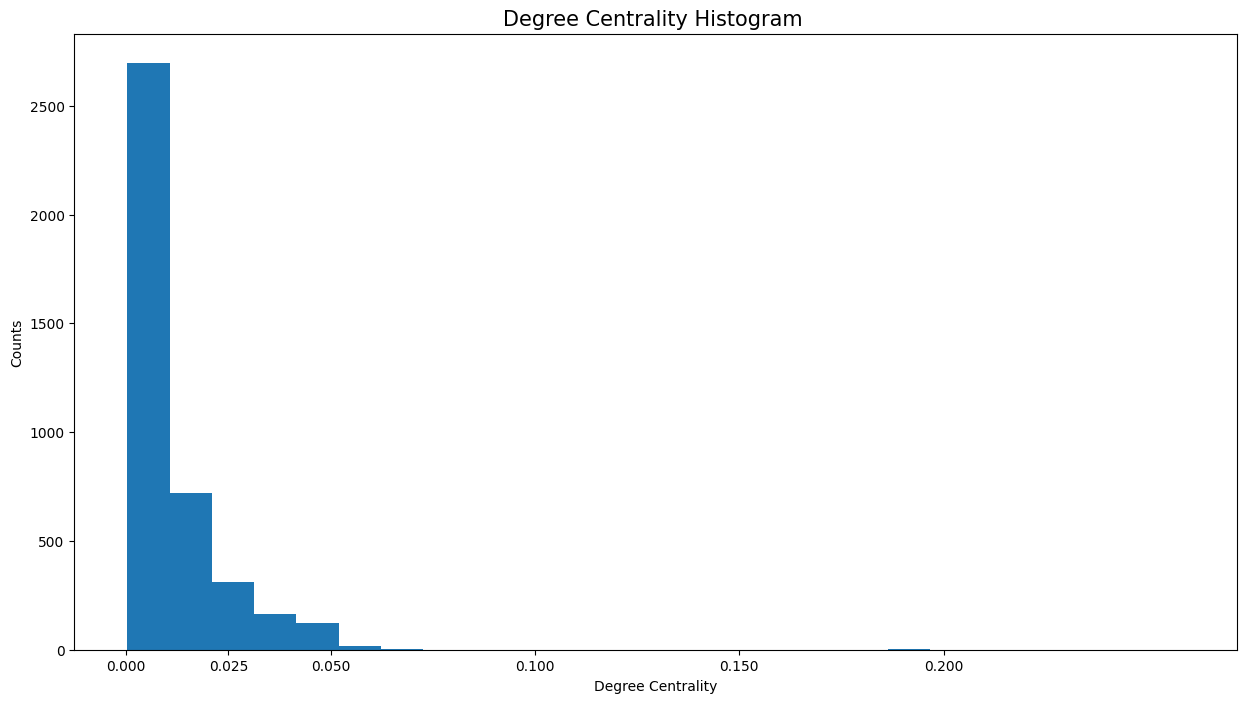

In [36]:
# plotting the distribution of degree centralities
plt.figure(figsize=(15, 8))
plt.hist(deg_centrality.values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])  # set the x axis ticks
plt.title("Degree Centrality Histogram ", fontdict={"size": 15}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 10})
plt.ylabel("Counts", fontdict={"size": 10})

**Betweenness Centrality** measure find nodes that most frequently act as 'bridges' between other nodes, which form the shortest path of communication within the network.

In [32]:
bet_centrality = nx.betweenness_centrality(FBG, normalized=True, endpoints=True)
(sorted(bet_centrality.items(), key=lambda x: x[1], reverse=True))[:5]


[(107, 0.48077531149557645),
 (1684, 0.33812535393929544),
 (3437, 0.23649361170042005),
 (1912, 0.22967697101070242),
 (1085, 0.14943647607698152)]

From above, nodes 107, 1684, 3437 , 1912 indicate important gatekeepers of information between groups. Node 107 lies on almost half of the total shortest paths between other nodes.

**Closeness Centrality** measure find nodes that are closest to other nodes in the network, based on their ability to reach them.

In [10]:
clse_centrality = nx.closeness_centrality(FBG)
sorted_clscen = sorted(clse_centrality.items(), key=lambda x: x[1], reverse=True)
print(sorted_clscen)

[(107, 0.45969945355191255), (58, 0.3974018305284913), (428, 0.3948371956585509), (563, 0.3939127889961955), (1684, 0.39360561458231796), (171, 0.37049270575282134), (348, 0.36991572004397216), (483, 0.3698479575013739), (414, 0.3695433330282786), (376, 0.36655773420479304), (475, 0.3661920740001814), (566, 0.36496746203904556), (1666, 0.3647037572254335), (1534, 0.36460496613995486), (484, 0.3631621548700423), (353, 0.36309684380901), (1171, 0.3624450228884301), (651, 0.36228243315987796), (420, 0.3610192221725525), (1085, 0.35785182559376105), (1687, 0.35725028753428295), (1577, 0.35718708536045995), (1718, 0.3566507684154743), (1165, 0.3564933345104617), (1136, 0.3563045971940351), (1465, 0.35461491174145954), (0, 0.35334266713335666), (1912, 0.35094733182687293), (580, 0.34503973340169186), (1505, 0.34275528393175453), (1405, 0.3424936386768448), (1656, 0.3420294765373539), (990, 0.34188468376936754), (1642, 0.3418557399254995), (1758, 0.341826800981969), (1419, 0.3417400135409614)

**PageRank Centrality** identifies important nodes by assigning each a score based on incoming links ('indegree'). These links are weighted depending on the relative score of originating node.

In [12]:
pgrnk_centrality = nx.pagerank(FBG)
sorted_pgrnkcen = sorted(pgrnk_centrality.items(), key=lambda x: x[1], reverse=True)
print(sorted_pgrnkcen)

[(3437, 0.0076145868447496), (107, 0.006936420955866117), (1684, 0.006367162138306824), (0, 0.006289602618466542), (1912, 0.003876971600884498), (348, 0.002348096972780577), (686, 0.002219359259800019), (3980, 0.0021703235790099928), (414, 0.001800299047070226), (698, 0.0013171153138368812), (483, 0.0012974283300616095), (3830, 0.0011844348977671697), (376, 0.0009014073664792465), (2047, 0.0008410291545974014), (56, 0.0008039024292749443), (25, 0.0008004126605197681), (828, 0.0007886905420662137), (322, 0.0007867992190291398), (475, 0.0007853586142469625), (428, 0.0007800171933479687), (67, 0.0007724556453836683), (3596, 0.0007657185486816221), (2313, 0.0007541077515661331), (713, 0.0007493481050218993), (271, 0.0007457889296014826), (563, 0.0007402839803830181), (917, 0.0007331559412352087), (119, 0.0007319072593209059), (3545, 0.0007271573982528108), (3938, 0.000726601468756114), (277, 0.0007191102550992674), (1888, 0.0007117172673725062), (1800, 0.0006984646532952213), (3604, 0.0006

**Distance / shortest path** measures the number of hops apart two nodes in the network.

In [21]:
source_node = 3437
hops = 2

spd_measure = nx.single_source_shortest_path_length(FBG, source_node, cutoff=hops)
print(spd_measure)


{3437: 0, 567: 1, 698: 1, 857: 1, 862: 1, 1085: 1, 3438: 1, 3439: 1, 3440: 1, 3441: 1, 3442: 1, 3443: 1, 3444: 1, 3445: 1, 3446: 1, 3447: 1, 3448: 1, 3449: 1, 3450: 1, 3451: 1, 3452: 1, 3453: 1, 3454: 1, 3455: 1, 3456: 1, 3457: 1, 3458: 1, 3459: 1, 3460: 1, 3461: 1, 3462: 1, 3463: 1, 3464: 1, 3465: 1, 3466: 1, 3467: 1, 3468: 1, 3469: 1, 3470: 1, 3471: 1, 3472: 1, 3473: 1, 3474: 1, 3475: 1, 3476: 1, 3477: 1, 3478: 1, 3479: 1, 3480: 1, 3481: 1, 3482: 1, 3483: 1, 3484: 1, 3485: 1, 3486: 1, 3487: 1, 3488: 1, 3489: 1, 3490: 1, 3491: 1, 3492: 1, 3493: 1, 3494: 1, 3495: 1, 3496: 1, 3497: 1, 3498: 1, 3499: 1, 3500: 1, 3501: 1, 3502: 1, 3503: 1, 3504: 1, 3505: 1, 3506: 1, 3507: 1, 3508: 1, 3509: 1, 3510: 1, 3511: 1, 3512: 1, 3513: 1, 3514: 1, 3515: 1, 3516: 1, 3517: 1, 3518: 1, 3519: 1, 3520: 1, 3521: 1, 3522: 1, 3523: 1, 3524: 1, 3525: 1, 3526: 1, 3527: 1, 3528: 1, 3529: 1, 3530: 1, 3531: 1, 3532: 1, 3533: 1, 3534: 1, 3535: 1, 3536: 1, 3537: 1, 3538: 1, 3539: 1, 3540: 1, 3541: 1, 3542: 1, 3543

### Few observations per below -
 - a node is connected to almost 44 other nodes (neighbors)...

In [20]:
np.mean([d for _, d in FBG.degree()])

43.69101262688784

In [22]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(FBG))

- Per below, in order to connect from one node to any other, will have to traverse 8 edges or fewer!

In [24]:
diameter = max(nx.eccentricity(FBG, sp=shortest_path_lengths).values())
print(diameter)

8


- Per below, roughly ~3.6 edges will be traversed on average..

In [25]:
# Compute the average shortest path length for each node
average_path_lengths = [
    np.mean(list(spl.values())) for spl in shortest_path_lengths.values()
]
# The average over all nodes
np.mean(average_path_lengths)

3.691592636562027

## **Clustering Effects**

The **clustering coefficient of a node**  is defined as the probability that two randomly selected friends of  are friends with each other. As a result, the average clustering coefficient is the average of clustering coefficients of all the nodes.  
The closer the average clustering coefficient is to 1, the more complete the graph will be because there’s just one giant component. Lastly, it is a sign of triadic closure because the more complete the graph is, the more triangles will usually arise.

In [33]:
#average clustering
#
nx.average_clustering(FBG)

0.6055467186200876

Text(0, 0.5, 'Counts')

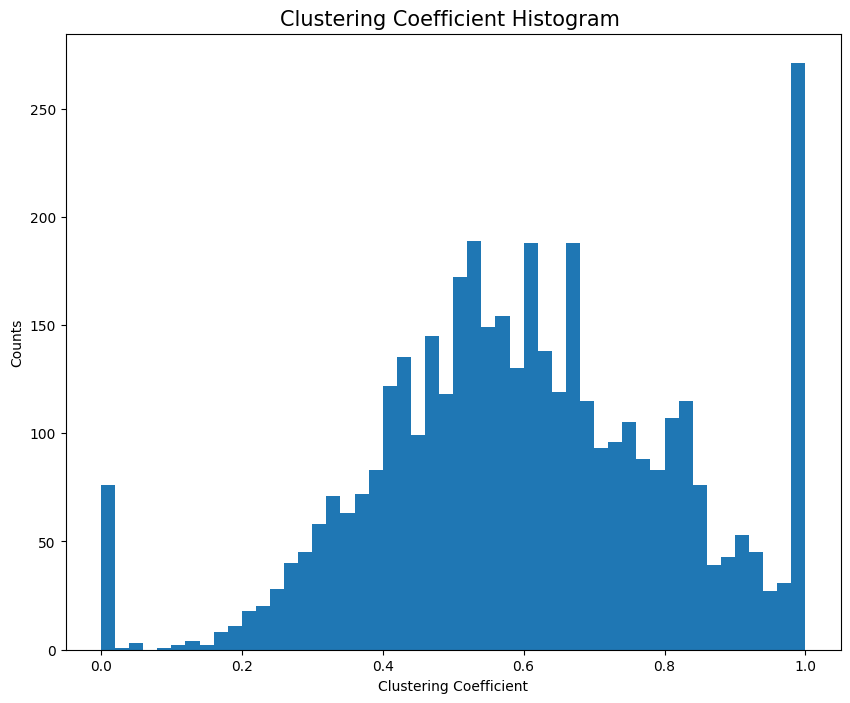

In [35]:
# plot of clustering coefficient
plt.figure(figsize=(10, 8))
plt.hist(nx.clustering(FBG).values(), bins=50)
plt.title("Clustering Coefficient Histogram ", fontdict={"size": 15}, loc="center")
plt.xlabel("Clustering Coefficient", fontdict={"size": 10})
plt.ylabel("Counts", fontdict={"size": 10})

Per above plot, it can be seen the bins of clustering coefficient between 0.4 and 0.8 contain the majority of nodes thus far.

In [8]:
# triangles in the network with each triangle counted once for each node
# given the number of triangles, signifies a triadic closure
#
triangles_per_node = list(nx.triangles(FBG).values())
print("Number of Unique Triangles: ", sum(triangles_per_node) / 3)
print("")
print("Median number of triangles that a node is part of: ", np.median(triangles_per_node))


Number of Unique Triangles:  1612010.0

Median number of triangles that a node is part of:  161.0


In [9]:
sdeg_cent = sorted(list(deg_centrality.values()),reverse=True)
clustering_coef = nx.clustering(FBG)
sclcoef = list(clustering_coef.values())
X = np.column_stack((sdeg_cent, sclcoef))
print(X.shape)
print(X[0:10])

(4039, 2)
[[0.25879148 0.04196165]
 [0.1961367  0.41911765]
 [0.18697375 0.88888889]
 [0.1354631  0.63235294]
 [0.08593363 0.86666667]
 [0.07280832 0.33333333]
 [0.07206538 0.93333333]
 [0.06290243 0.43157895]
 [0.0606736  0.67857143]
 [0.05819713 0.39724311]]


In [10]:
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled.shape)
print(X_scaled[0:10])

(4039, 2)
[[19.10380394 -2.62822483]
 [14.27685995 -0.86939407]
 [13.57094324  1.321339  ]
 [ 9.6025466   0.12500824]
 [ 5.7867806   1.2177078 ]
 [ 4.77560262 -1.26944098]
 [ 4.71836613  1.5286014 ]
 [ 4.01244942 -0.81128199]
 [ 3.84073995  0.34054372]
 [ 3.64995165 -0.97140388]]


Text(0, 0.5, 'SSE / Inertia')

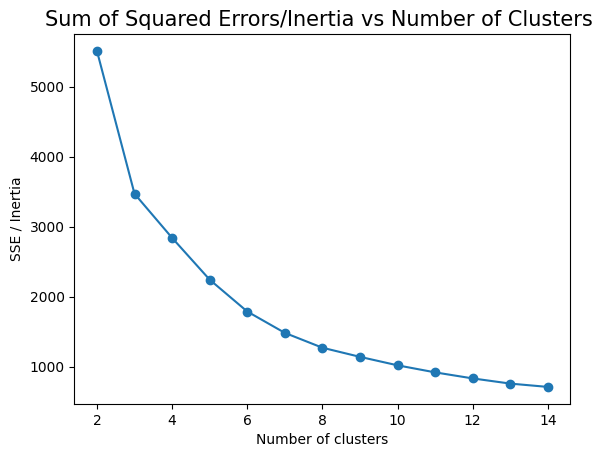

In [103]:
sse = []
silhouette_scores_kmeans = []
db_scores_kmeans = []
calinski_harabasz_score_kmeans = []

trial_num_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
for num_clusters in trial_num_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    silhouette_scores_kmeans.append(silhouette_score(X_scaled, kmeans.labels_, metric='euclidean'))
    db_scores_kmeans.append(davies_bouldin_score(X_scaled, kmeans.labels_))
    calinski_harabasz_score_kmeans.append(calinski_harabasz_score(X_scaled, kmeans.labels_))
x = np.array([i for i in range(2,15)])
plt.plot(x, sse, marker = 'o')
plt.title("Sum of Squared Errors/Inertia vs Number of Clusters ", fontdict={"size": 15}, loc="center")
plt.xlabel("Number of clusters", fontdict={"size": 10})
plt.ylabel("SSE / Inertia", fontdict={"size": 10})

### Visualize the cluster formed by KMeans algorithm ...

[4 4 4 ... 5 1 0]


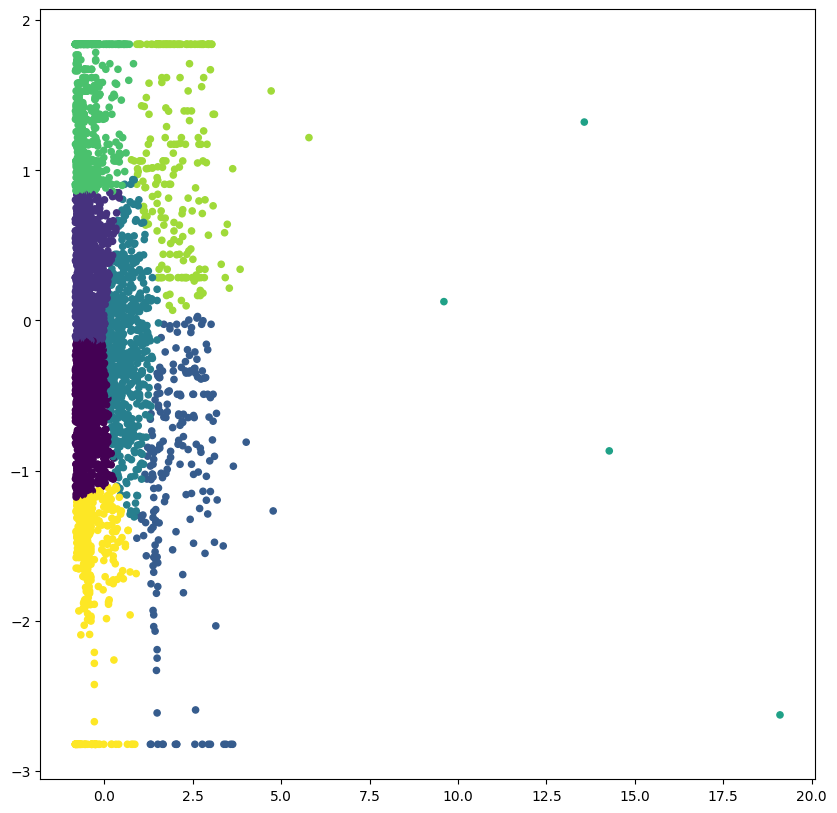

In [107]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(X_scaled)
plt.figure(figsize =(10, 10))
print(kmeans.labels_)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, s=20)

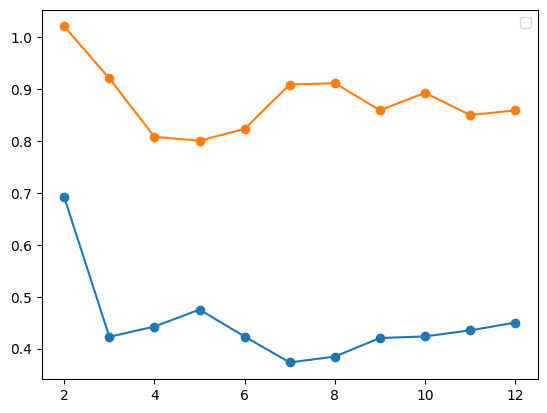

In [114]:
silhouette_scores_agg = []
db_scores_agg = []
calinski_harabasz_agg = []

trial_num_clusters = [2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14]
for num_clusters in trial_num_clusters:
    agg = AgglomerativeClustering(n_clusters = num_clusters).fit(X_scaled)
    silhouette_scores_agg.append(silhouette_score(X_scaled, agg.labels_, metric='sqeuclidean'))
    db_scores_agg.append(davies_bouldin_score(X_scaled, agg.labels_))
    calinski_harabasz_agg.append(calinski_harabasz_score(X_scaled, agg.labels_))

x = np.array([i for i in range(2,13)])
plt.plot(x, silhouette_scores_agg, marker = 'o')
plt.plot(x, db_scores_agg, marker = 'o')
# so 8 is the best (the lower the better)

[4 4 4 ... 3 1 1]


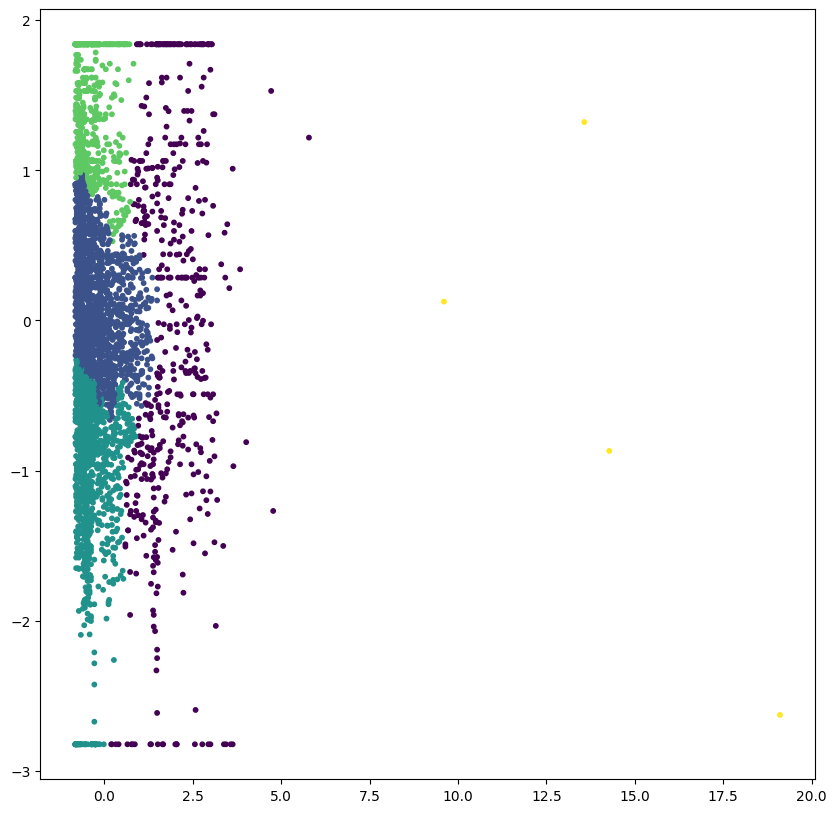

In [112]:
agg = AgglomerativeClustering(n_clusters = 5).fit(X_scaled)
print(agg.labels_)
plt.figure(figsize =(10, 10))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agg.labels_, s=10)

In [11]:
epsilon = 0.5
while epsilon <= 0.9:
  for minimum_samples in range (10, 101, 10):
     dbscan = DBSCAN(eps = epsilon, min_samples=minimum_samples)
     dbscan_clusters = dbscan.fit_predict(X_scaled)
     silhouette_avg = silhouette_score(X_scaled, dbscan.labels_)
     db_score = davies_bouldin_score(X_scaled, dbscan.labels_)
     print(epsilon)
     print(minimum_samples)
     print(silhouette_avg)
     print(db_score)
     print(len(np.unique(dbscan_clusters)))
     print('-----------')
  epsilon += 0.1

0.5
10
0.6947969377965943
0.9112773191896765
2
-----------
0.5
20
0.6631814870920656
0.9318326095757431
2
-----------
0.5
30
0.6379576844066982
0.9325822358534657
2
-----------
0.5
40
0.44254773080351445
0.8910640305069996
3
-----------
0.5
50
0.3428474864478223
0.9249847224886949
4
-----------
0.5
60
0.4184841443876097
3.3002455207807238
3
-----------
0.5
70
0.5287198718213911
1.310846520283744
2
-----------
0.5
80
0.5268710359539236
1.2934587391111425
2
-----------
0.5
90
0.5242212673427481
1.2624686446834394
2
-----------
0.5
100
0.5206771785942422
1.2650185973686492
2
-----------
0.6
10
0.7568163916105384
0.8485511644269126
2
-----------
0.6
20
0.7020910184817301
0.9113951972336618
2
-----------
0.6
30
0.6771775808454581
0.9298795470077129
2
-----------
0.6
40
0.6546892284285172
0.9191179589683715
2
-----------
0.6
50
0.6365811991154904
0.9844249045345032
2
-----------
0.6
60
0.5774736657579342
1.4812928494666775
2
-----------
0.6
70
0.5556038470201883
1.590835644778783
2
---------

In [92]:
dbscan = DBSCAN(eps = 0.8, min_samples=10)
dbscan_clusters = dbscan.fit_predict(X_scaled)
silhouette_avg = silhouette_score(X_scaled, dbscan.labels_)
db_score = davies_bouldin_score(X_scaled, dbscan.labels_)
ch_score = calinski_harabasz_score(X_scaled, dbscan.labels_)
print('Silhouette score = %f' % silhouette_avg)
print('DB index = %f' % db_score)
print('CH index = %f' % ch_score)
print('Total effective clusters (2 assigned + 1 unassinged) = %d' % len(np.unique(dbscan_clusters)))

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_noise_ = list(dbscan.labels_).count(-1)

print("Number of clusters: %d" % n_clusters_)
print("Number of noise points: %d" % n_noise_)

Silhouette score = 0.818954
DB index = 0.703994
CH index = 383.015934
Total effective clusters (2 assigned + 1 unassinged) = 2
Number of clusters: 1
Number of noise points: 9


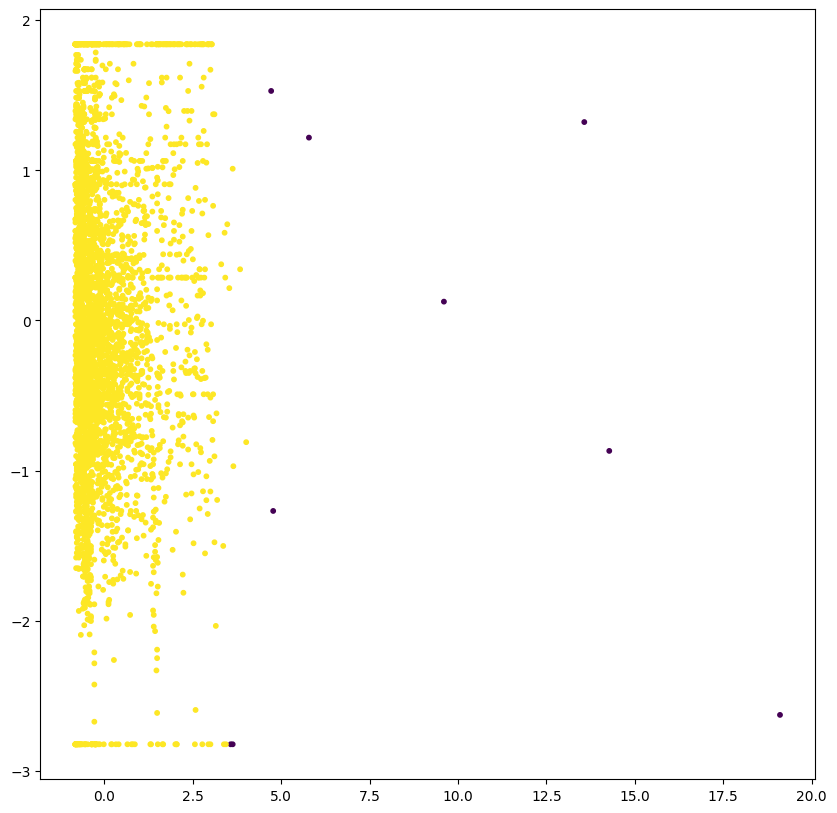

In [82]:
plt.figure(figsize =(10, 10))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan.labels_, s=10)

In [ ]:
plot_model(kmeans)

In [ ]:
max(x for x,y in nx.degree(G1))

4038

In [ ]:
plot_model(kmeans, plot = 'tsne')

In [ ]:
dbs = create_model('dbscan')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
H = nx.DiGraph(nx_graph)
list(H.edges())

In [ ]:
# plot graph
plt.figure(figsize=(10,10))

pos = nx.random_layout(nx.graph)
nx.draw(nx.graph, with_labels=False,  pos = pos, node_size = 40, alpha = 0.6, width = 0.7)



In [ ]:
sub_avgdeg = []
import numpy as np
for vertex in igraph_fb.vs:
  # Get the neighbors of the vertex, order =2 limits the subgraph to
  # 2 hop i.e, only immediate neighbors and their immediate
  # neighbors for this node will be considered.
  neighbors_within_2_hops = igraph_fb.neighborhood(vertex, order = 2)
  subgraph = igraph_fb.subgraph(neighbors_within_2_hops)

  sub_avgdeg.append(np.array(subgraph.degree()).mean())

In [ ]:
# prompt: print sub_avgdeg with all neighbors nodes and vertices

for i, vertex in enumerate(igraph_fb.vs):
  neighbors_within_2_hops = igraph_fb.neighborhood(vertex, order = 2)
  subgraph = igraph_fb.subgraph(neighbors_within_2_hops)
  print("Node:", vertex.index, "Average degree:", np.array(subgraph.degree()).mean())


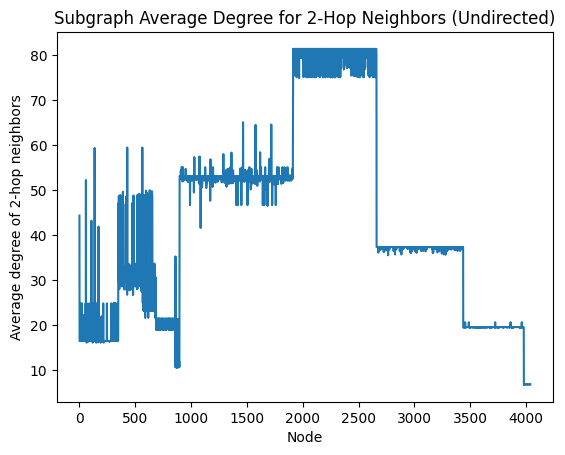

In [ ]:
# prompt: plot sub_avgdeg undirected graph

# Plot the sub_avgdeg list as an undirected graph
import matplotlib.pyplot as plt

plt.plot(sub_avgdeg)
plt.xlabel("Node")
plt.ylabel("Average degree of 2-hop neighbors")
plt.title("Subgraph Average Degree for 2-Hop Neighbors (Undirected)")
plt.show()
